## How well do jobs and skills pay for Data Analysts in Germany?

In [ ]:
Methodolody
1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for Data Analyts 
2. Visualize for highest paying skills and most demanded skills 

In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

c:\Users\49157\anaconda3\envs\dataenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
#Data clean up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_DE = df[df['job_country'] == 'Germany'].dropna(subset=['salary_year_avg'])

In [4]:
job_titles = df_DE['job_title_short'].value_counts().index[:6].tolist()
job_titles

['Data Analyst',
 'Data Scientist',
 'Data Engineer',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Senior Data Scientist']

In [5]:
df_DE_top6 = df_DE[df_DE['job_title_short'].isin(job_titles)]

In [11]:
job_order = df_DE_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

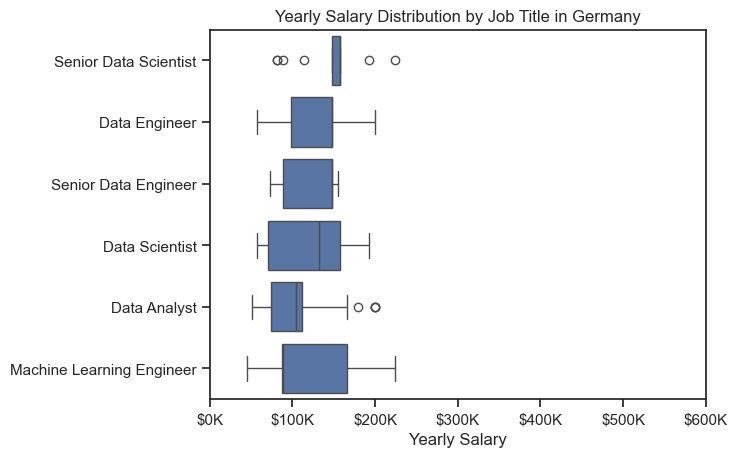

In [12]:
sns.boxplot(data=df_DE_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
plt.title('Yearly Salary Distribution by Job Title in Germany')
plt.xlabel('Yearly Salary')
plt.ylabel('')
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

## Investigate Median Salary Vs Skill for Data Analysts in Germany

In [14]:
df_DA_DE = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Germany')].copy()

In [15]:
df_DA_DE = df_DA_DE.dropna(subset=['salary_year_avg'])
df_DA_DE = df_DA_DE.explode('job_skills')

In [16]:
df_DA_top_pay = df_DA_DE.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median', ascending=False).head(10)

In [24]:
df_DA_skills = df_DA_DE.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count', ascending=False)
df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

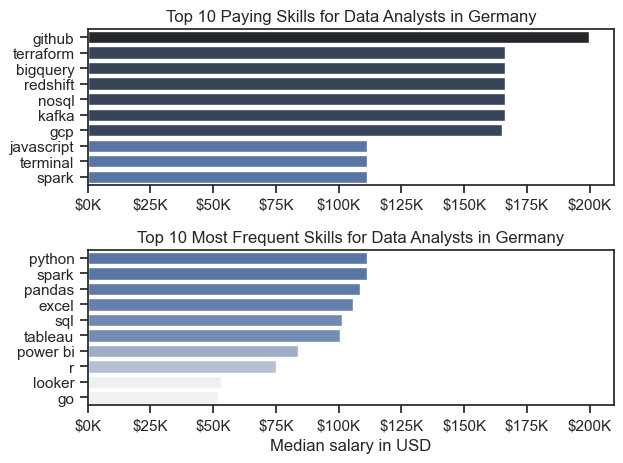

In [26]:
fig, ax = plt.subplots(2, 1)
sns.set_theme(style='ticks')
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')
#df_DA_top_pay.plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].legend().remove()
ax[0].set_title('Top 10 Paying Skills for Data Analysts in Germany')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))

#df_DA_skills.plot(kind='barh', y='median', ax=ax[1], legend=False)
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1], hue='median', palette='light:b')
ax[1].legend().remove()
ax[1].set_title('Top 10 Most Frequent Skills for Data Analysts in Germany')
ax[1].set_xlabel('Median salary in USD')
ax[1].set_ylabel('')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()